In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import numpy as np
import seaborn as sn
import scipy.optimize as opt 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold 
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve 
from matplotlib import pyplot 
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error

# Fetch data and cleaning data

In [26]:
col_list = ["Date"," Time"," EpochTime"," LogOp"," Pid"," package"," freeMemory"," CpuTime"," ProcessCpuLoad"," CurrentThreadCpuTime"," CurrentThreaduserTime"," SystemLoadAverage"," UserId"," TimeDiff"," Error"," Message"," Outcome"]
df = pd.read_csv("final_data2.csv", usecols=col_list)
print('Shape of the dataset: ' + str(df.shape))
print(df.head())

Shape of the dataset: (198452, 17)
         Date          Time      EpochTime  LogOp    Pid  \
0  2020-07-30  22:10:27.063  1596127227063   INFO  63647   
1  2020-07-30  22:10:27.067  1596127227067   INFO  63647   
2  2020-07-30  22:10:27.067  1596127227067   INFO  63647   
3  2020-07-30  22:10:27.067  1596127227067   INFO  63647   
4  2020-07-30  22:10:27.067  1596127227067   INFO  63647   

                          package  freeMemory      CpuTime  \
0  com.dev.kgf.ApplicationStarter   643836128  65660059000   
1  com.dev.kgf.ApplicationStarter   643836128  65667444000   
2  com.dev.kgf.ApplicationStarter   643836128  65667509000   
3  com.dev.kgf.ApplicationStarter   643836128  65667551000   
4  com.dev.kgf.ApplicationStarter   643836128  65667599000   

         ProcessCpuLoad  CurrentThreadCpuTime  CurrentThreaduserTime  \
0                0.0625            5940593000             4914928000   
1    0.1332972582972583            5942996000             4915261000   
2    0.06461864

/Users/jyotsana.j/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (6,7,8,9,10,11,12,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


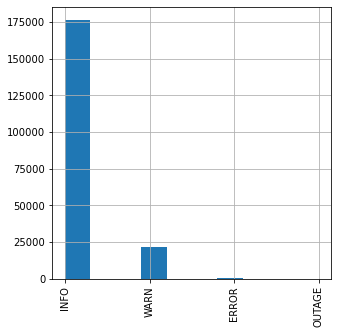

In [34]:
df[' LogOp'].hist(figsize = (5,5),xrot=90)

In [ ]:
df4[''].hist(bins=18,figsize = (15,20),orientation='horizontal',yrot=45)

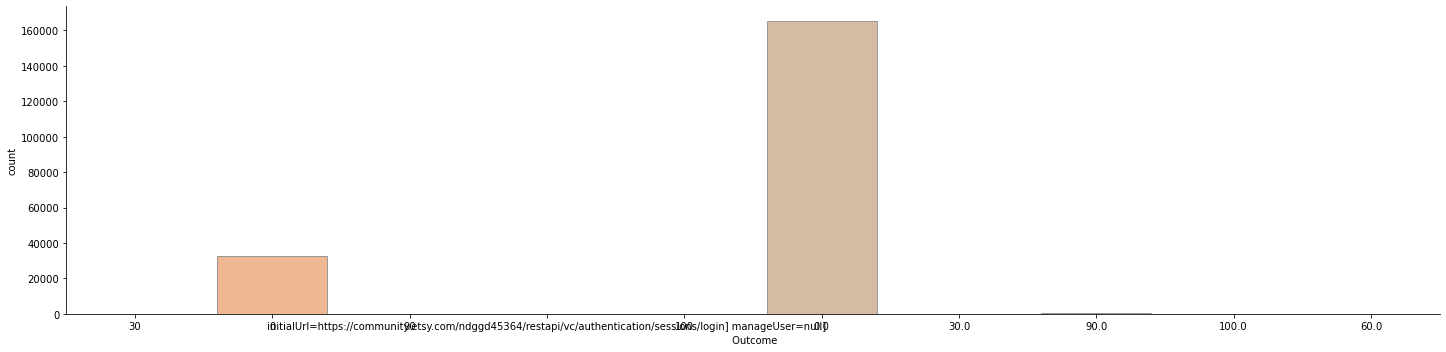

In [3]:
df=df.rename(columns=lambda x: x.strip())
df_temp=df.drop(columns=['EpochTime','Date','Time','Pid','package','UserId','Error',"Message"])
df=df.drop(columns=['EpochTime','LogOp','Date','Time','Pid','package','UserId','Error',"Message"])
df

,freeMemory,CpuTime,ProcessCpuLoad,CurrentThreadCpuTime,CurrentThreaduserTime,SystemLoadAverage,TimeDiff,Outcome
0,643836128,65660059000,0.0625,5940593000,4914928000,3.66015625,0.0,30
1,643836128,65667444000,0.1332972582972583,5942996000,4915261000,3.66015625,4.0,0
2,643836128,65667509000,0.0646186440677966,5943055000,4915299000,3.66015625,0.0,0
3,643836128,65667551000,0.0625,5943095000,4915322000,3.66015625,0.0,0
4,643836128,65667599000,0.06380208333333333,5943143000,4915346000,3.66015625,0.0,0
...,...,...,...,...,...,...,...,...
198447,72796720,7030262000,0.0631313,3153912000,2829502000,3.00537,0.0,0
198448,72796720,7030421000,0.0625,3154073000,2829582000,3.00537,1.0,0
198449,72796720,7030421000,0.0625,3154073000,2829582000,3.00537,0.0,0
198450,72796720,7030593000,0.0621387,3154245000,2829675000,3.00537,0.0,0


In [4]:
df.replace(' ', np.nan, inplace= True)
df.dropna(inplace=True)

In [5]:
for col in list(df.columns.values):
    df[col]=pd.to_numeric(df[col])

In [6]:
for col in list(df.columns.values):
    df[col]=df[col].interpolate(method='pad')

In [7]:
print(df.head())
print('----------------------------------------------------------')
print(df.info())

   freeMemory      CpuTime  ProcessCpuLoad  CurrentThreadCpuTime  \
0   643836128  65660059000        0.062500            5940593000   
1   643836128  65667444000        0.133297            5942996000   
2   643836128  65667509000        0.064619            5943055000   
3   643836128  65667551000        0.062500            5943095000   
4   643836128  65667599000        0.063802            5943143000   

   CurrentThreaduserTime  SystemLoadAverage  TimeDiff  Outcome  
0             4914928000           3.660156       0.0     30.0  
1             4915261000           3.660156       4.0      0.0  
2             4915299000           3.660156       0.0      0.0  
3             4915322000           3.660156       0.0      0.0  
4             4915346000           3.660156       0.0      0.0  
----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 196195 entries, 0 to 198451
Data columns (total 8 columns):
 #   Column                 Non-

# Data Preprocessing

In [8]:
min_max_scaler = preprocessing.MinMaxScaler()

In [9]:
y=pd.DataFrame(df["Outcome"])
X=df.drop(columns=['Outcome'])

In [10]:
y=y.astype(int)
y.Outcome.unique()

array([ 30,   0,  90, 100,  60])

In [11]:
x_trainset, x_testset, y_trainset, y_testset = train_test_split(X,y,stratify=y, test_size=0.3, random_state=0)

In [12]:
num_cols=['freeMemory','CpuTime','ProcessCpuLoad','CurrentThreadCpuTime','CurrentThreaduserTime','SystemLoadAverage','TimeDiff']
X_scaled = min_max_scaler.fit(x_trainset)

In [13]:
new_df = X_scaled.transform(x_trainset)
x_trainset = pd.DataFrame(new_df)
new_df1 = X_scaled.transform(x_testset)
x_testset = pd.DataFrame(new_df1)

In [14]:
y_trainset['Outcome']=y_trainset['Outcome'].replace(np.nan, 0)
y_testset['Outcome']=y_testset['Outcome'].replace(np.nan, 0)

/Users/jyotsana.j/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/jyotsana.j/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
x_trainset.describe()

,0,1,2,3,4,5,6
count,137336.000000,137336.000000,137336.000000,137336.000000,137336.000000,137336.000000,137336.000000
mean,0.433114,0.184220,0.009375,0.600721,0.642557,0.621912,0.000310
std,0.214076,0.069374,0.026794,0.168672,0.175774,0.196059,0.009416
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250978,0.141551,0.003148,0.477099,0.501679,0.435603,0.000000
50%,0.418117,0.185474,0.003256,0.565717,0.596659,0.613620,0.000000
75%,0.585848,0.224862,0.006296,0.730764,0.803988,0.753425,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
y_trainset.Outcome.unique()

array([  0,  90,  30,  60, 100])

# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=4).fit(x_trainset, y_trainset['Outcome'])

In [23]:
y_test_pred1=clf.predict(x_testset)
rmse = np.sqrt(mean_squared_error(y_testset, y_test_pred1))
print("RMSE: %f" % (rmse))

RMSE: 1.929367


In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_testset,y_test_pred1,labels=[0, 30, 60, 90,100]))
print(classification_report(y_testset,y_test_pred1,labels=[0, 30, 60, 90,100]))
print(accuracy_score(y_testset, y_test_pred1))

[[58780     0     0     1     0]
 [    6     2     0     0     0]
 [    1     0     0     0     0]
 [   20     0     0    45     0]
 [    4     0     0     0     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58781
          30       1.00      0.25      0.40         8
          60       0.00      0.00      0.00         1
          90       0.98      0.69      0.81        65
         100       0.00      0.00      0.00         4

    accuracy                           1.00     58859
   macro avg       0.60      0.39      0.44     58859
weighted avg       1.00      1.00      1.00     58859

0.9994563278343159


/Users/jyotsana.j/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# XGBoost

In [ ]:
model1 = xgb.XGBRegressor(objective = 'reg:squarederror', learning_rate=0.8,
                           alpha=10, subsample=0.8, colsample_bytree=1, n_estimators = 10, max_depth = 5)
model1.fit(x_trainset,y_trainset)

In [ ]:
y_test_pred_xg = model1.predict(x_testset)
rmse = np.sqrt(mean_squared_error(y_testset, y_test_pred_xg))
print("RMSE: %f" % (rmse))

In [ ]:
out=x_testset
out['actual_output']=y_testset['Outcome']
out['logistic_output']=pd.DataFrame(y_test_pred1.reshape(-1,1))
out['xg_output']=pd.DataFrame(y_test_pred_xg.reshape(-1,1))

In [ ]:
out.head()

In [ ]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

In [ ]:
pickle.dump(model1,open('xgb_model_new.pkl','wb'))
pickle.dump(X_scaled,open('minMax.pkl','wb'))

In [ ]:
pickle.dump(clf,open('logistic_regression.pkl','wb'))

In [ ]:
out.head()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_testset,y_pred,labels=[0, 30, 60, 90,100]))
print(classification_report(y_testset,y_pred,labels=[0, 30, 60, 90,100]))
print(accuracy_score(y_testset, y_pred))

In [ ]:
newData=[['348343928', '7943673000', '0.06395348837209303', '4189810000', '3891393000', '3.01318359375', 0]]

In [ ]:
df = pd.DataFrame(newData, columns=['freeMemory', 'CpuTime', 'ProcessCpuLoad', 'CurrentThreadCpuTime','CurrentThreaduserTime', 'SystemLoadAverage', 'TimeDiff'])
for col in df.columns:
    df[col] = pd.to_numeric(df[col])
num_cols = ['freeMemory', 'CpuTime', 'ProcessCpuLoad', 'CurrentThreadCpuTime', 'CurrentThreaduserTime','SystemLoadAverage', 'TimeDiff']
df[num_cols] = df[num_cols].values
new_df = X_scaled.transform(df)
new_df= pd.DataFrame(new_df)
output = model1.predict(new_df)
output2=clf.predict(new_df)

In [ ]:
output

In [ ]:
output2

In [ ]:
from sklearn import linear_model
from sklearn.metrics import r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
df.head()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


In [ ]:
factor = pd.factorize(df['Outcome'])
df.Outcome = factor[0]
definitions = factor[1]
print(df.Outcome.head())
print(definitions)
df.Outcome.unique()

In [ ]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(x_trainset, y_trainset.values.ravel())

In [ ]:
y_pred = classifier.predict(x_testset)

In [ ]:
reversefactor = dict(zip(range(5),definitions))

In [ ]:
y_testset = np.vectorize(reversefactor.get)(y_testset)

In [ ]:
y_pred = np.vectorize(reversefactor.get)(y_pred)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_testset,y_pred,labels=[0, 30, 60, 90,100]))
print(classification_report(y_testset,y_pred,labels=[0, 30, 60, 90,100]))
print(accuracy_score(y_testset, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
labels = ['0','30','60','90','100']
cm = confusion_matrix(y_testset,y_pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
import pickle
pickle.dump(classifier,open('random_forest.pkl','wb'))

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(x_trainset,y_trainset)

In [ ]:
y_test_pred_reg = reg.predict(x_testset)

In [ ]:
rmse_reg = np.sqrt(mean_squared_error(y_testset, y_test_pred_reg))

In [ ]:
print("RMSE: %f" % (rmse_reg))

In [ ]:
from statsmodels.api import OLS
OLS(y_trainset,x_trainset).fit().summary()